# Manipulability Analysis for 3-DOF Quadruped Leg

This notebook uses your `jacobian_numeric.py` model to:
- Compute Yoshikawa manipulability
- Sweep thigh & knee angles for several hip angles
- Plot heatmaps showing safe/unsafe regions

**Make sure `jacobian_numeric.py` is in the same folder as this notebook.**

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

from jacobian_numeric import jacobian_numeric

## Define Manipulability

Yoshikawa's manipulability measure:
$$ w = \sqrt{\det(J_v J_v^T)} $$

Where $J_v$ is the linear velocity Jacobian (top 3 rows).

In [2]:
def manipulability(J):
    """Compute Yoshikawa manipulability measure."""
    Jv = J[0:3, :]  # linear velocity rows
    M = Jv @ Jv.T
    det_val = np.linalg.det(M)
    return math.sqrt(max(det_val, 0.0))

## Joint Range Settings

- Hip angles swept across multiple values
- Thigh & knee generate a 2D heatmap for each hip slice
- SAFE/UNSAFE regions controlled by a manipulability threshold

In [9]:
HIP_SWEEP_DEG = [-90, -60, -45, -30, -15, 0, 15, 30, 45, 60, 90]

THIGH_MIN_DEG, THIGH_MAX_DEG = 0, 359
KNEE_MIN_DEG,  KNEE_MAX_DEG  = 0, 135

SAFE_THRESHOLD = 0.0008

def deg(x): return math.radians(x)

## Compute Manipulability Grid

For a given hip angle slice, compute the manipulability map over thighs × knees.

In [7]:
def compute_manipulability_map(hip_deg):
    thigh_vals = np.arange(THIGH_MIN_DEG, THIGH_MAX_DEG + 1, 2)
    knee_vals  = np.arange(KNEE_MIN_DEG,  KNEE_MAX_DEG  + 1, 2)

    W = np.zeros((len(thigh_vals), len(knee_vals)))
    SAFE = np.zeros_like(W, dtype=bool)

    hip_rad = deg(hip_deg)

    for i, t_deg in enumerate(thigh_vals):
        for j, k_deg in enumerate(knee_vals):

            q = [hip_rad, deg(t_deg), deg(k_deg)]
            J = jacobian_numeric(q)
            w = manipulability(J)

            W[i, j] = w
            SAFE[i, j] = w >= SAFE_THRESHOLD

    return thigh_vals, knee_vals, W, SAFE

## Plot Heatmap for a Single Hip Angle Slice

In [5]:
def plot_one_hip(thigh_vals, knee_vals, W, hip_deg):
    plt.figure(figsize=(10, 6))

    plt.imshow(
        W,
        extent=[knee_vals[0], knee_vals[-1], thigh_vals[0], thigh_vals[-1]],
        origin='lower',
        cmap='inferno',
        aspect='auto'
    )

    plt.colorbar(label="Manipulability")

    plt.contour(
        knee_vals,
        thigh_vals,
        W,
        levels=[SAFE_THRESHOLD],
        colors='cyan',
        linewidths=2,
        linestyles='dashed'
    )

    plt.title(f"Manipulability Heatmap — Hip = {hip_deg}° (Threshold = {SAFE_THRESHOLD})")
    plt.xlabel("Knee angle (deg)")
    plt.ylabel("Thigh angle (deg)")

    plt.tight_layout()
    plt.show()

## Sweep Hip Angles and Plot All Heatmaps

Computing for hip = -90°...


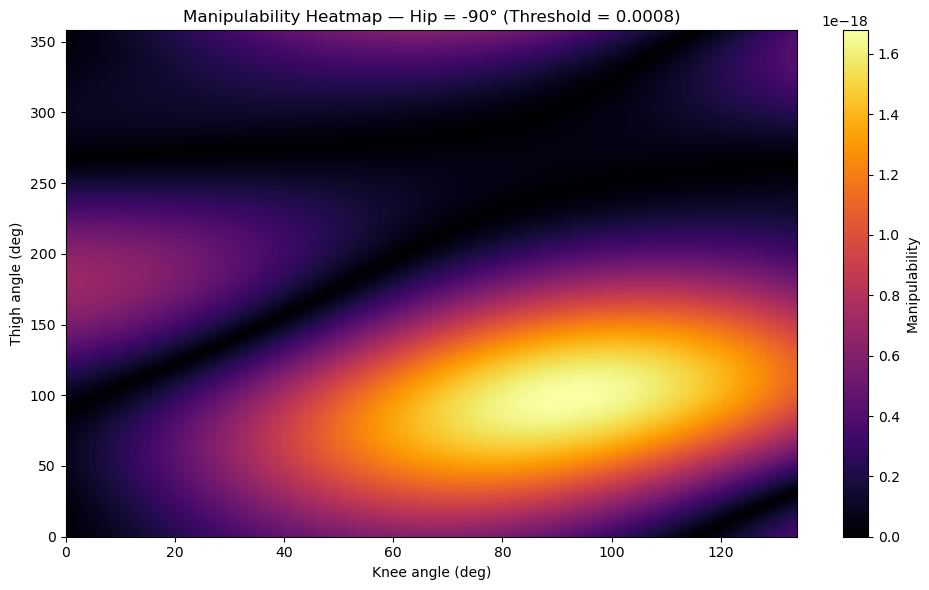

Computing for hip = -60°...


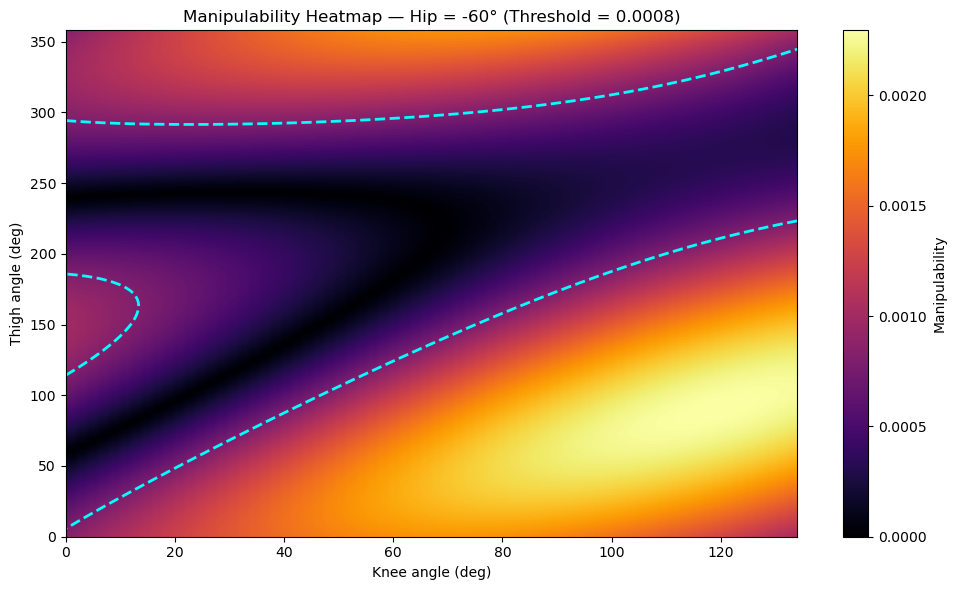

Computing for hip = -45°...


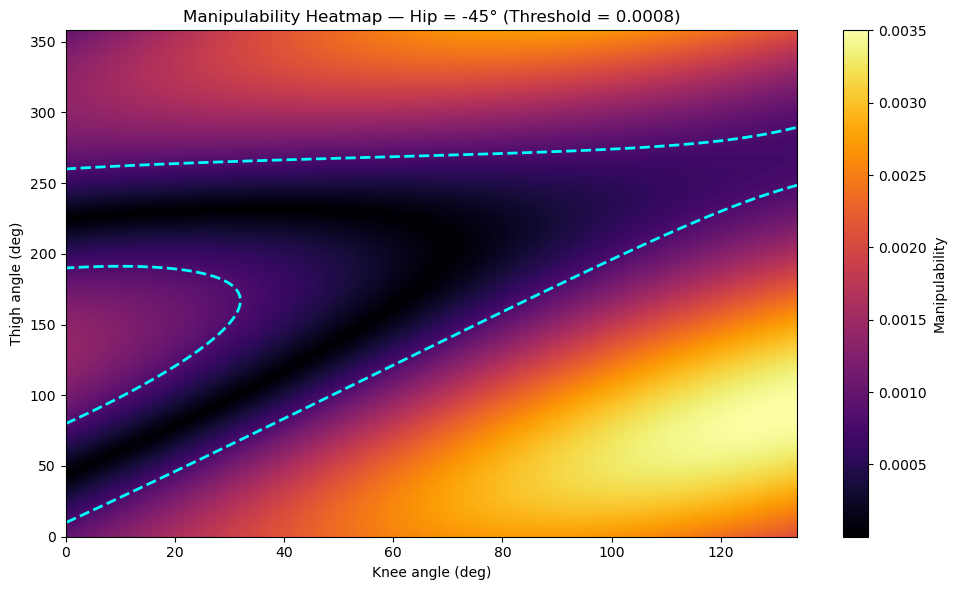

Computing for hip = -30°...


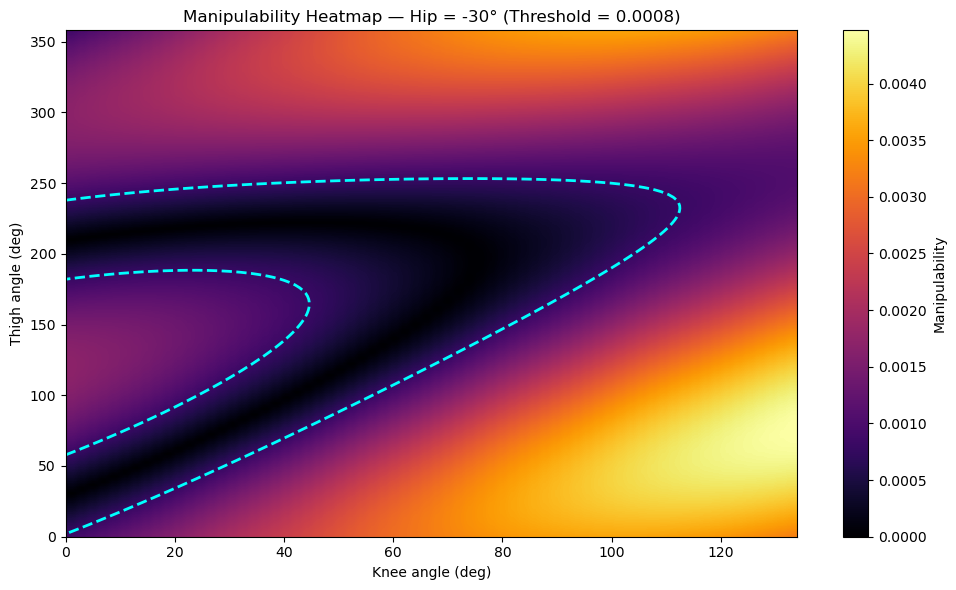

Computing for hip = -15°...


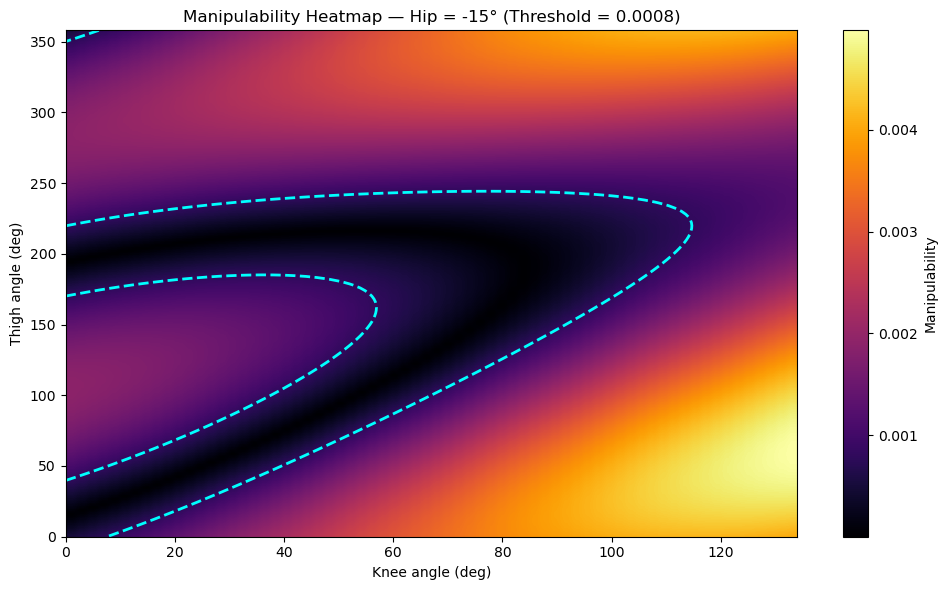

Computing for hip = 0°...


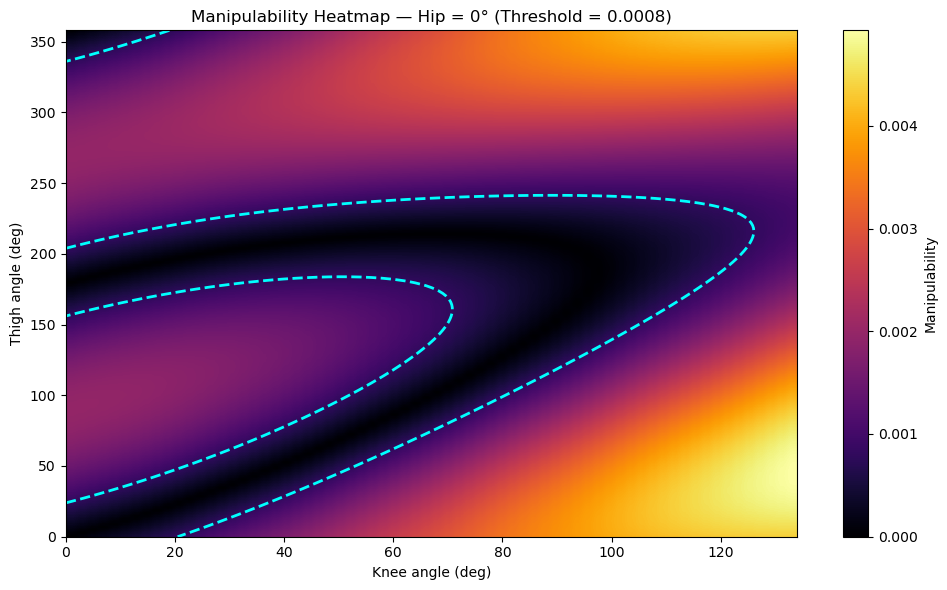

Computing for hip = 15°...


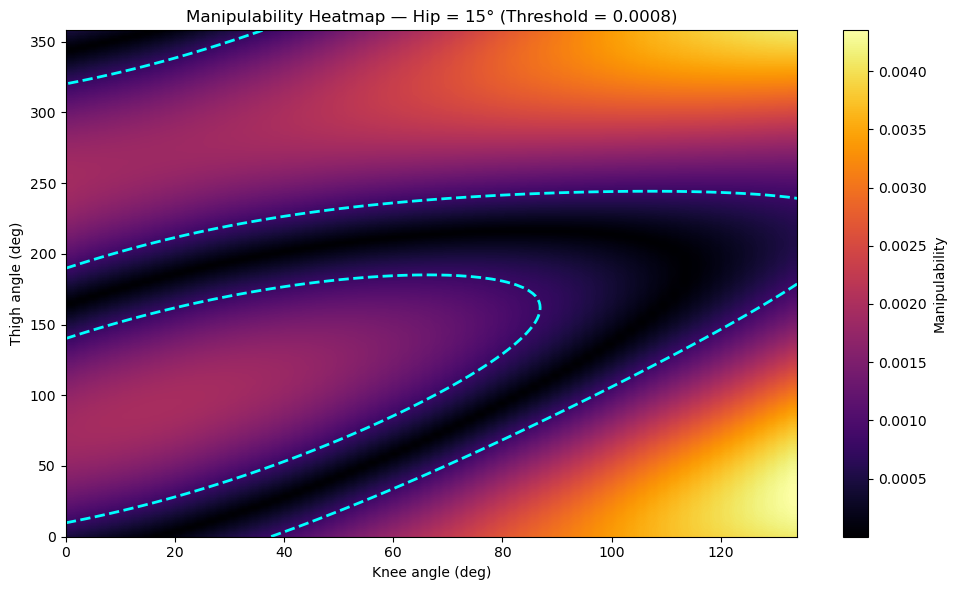

Computing for hip = 30°...


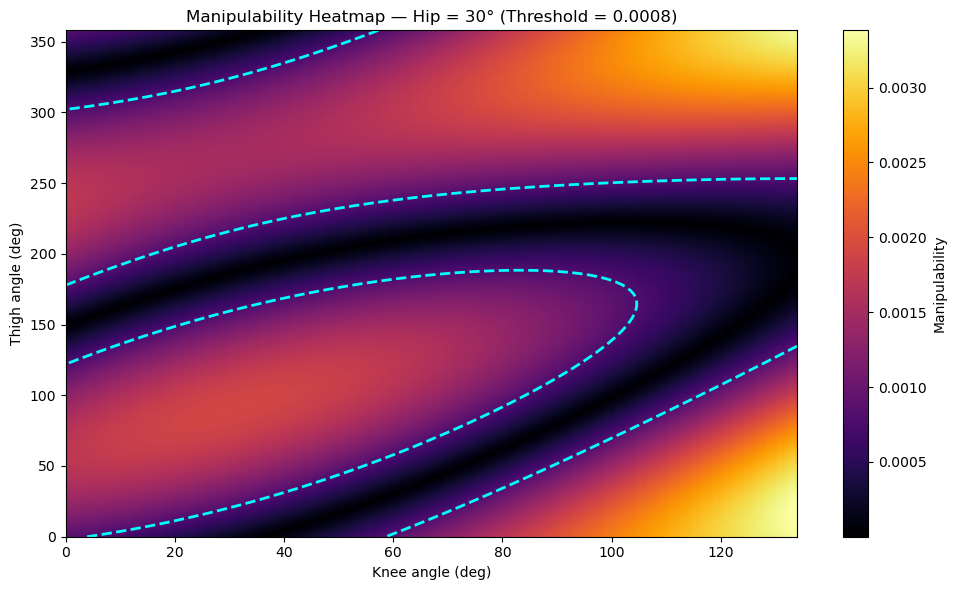

Computing for hip = 45°...


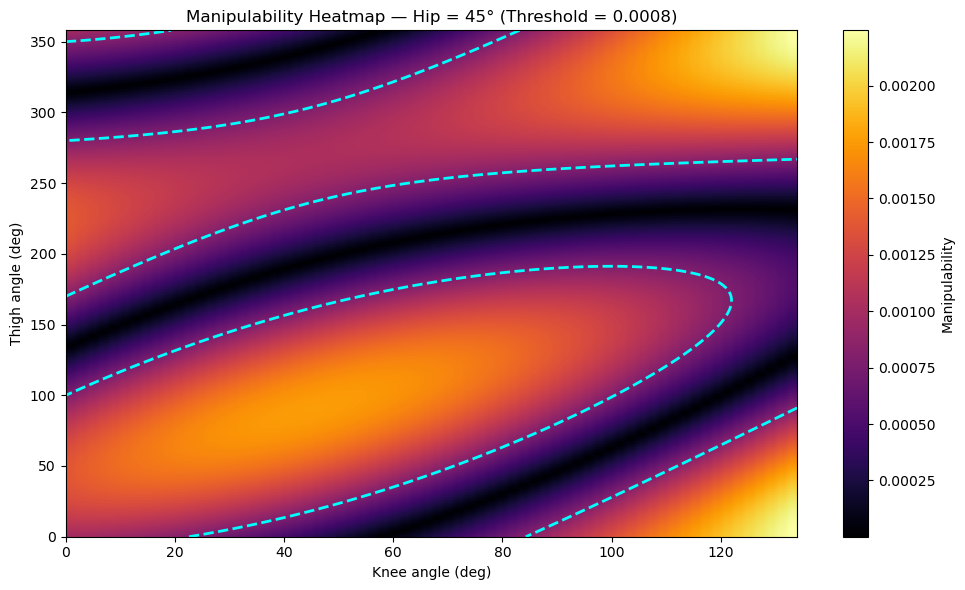

Computing for hip = 60°...


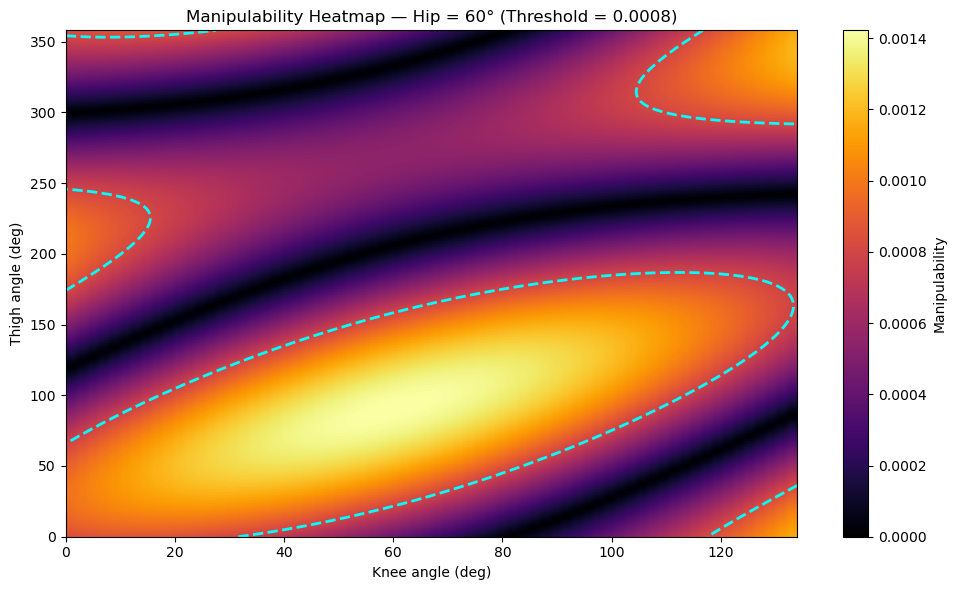

Computing for hip = 90°...


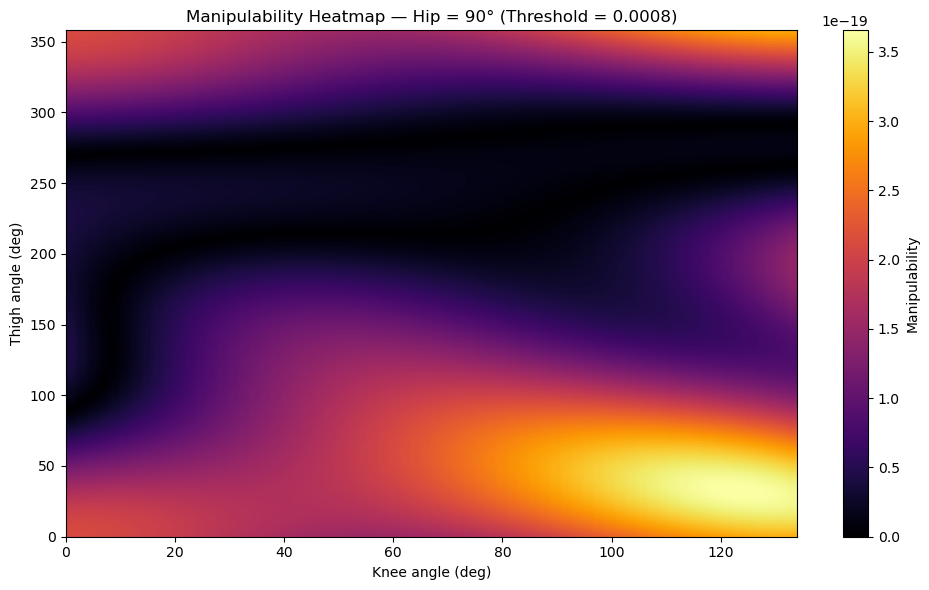

In [10]:
for hip_deg in HIP_SWEEP_DEG:
    print(f"Computing for hip = {hip_deg}°...")
    thigh_vals, knee_vals, W, SAFE = compute_manipulability_map(hip_deg)
    plot_one_hip(thigh_vals, knee_vals, W, hip_deg)